
# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In this project, we will be exploring the TMDB Movies dataset. This dataset contains 10,866  records of movies and 21 of its associated variables. The data is collected from year 1960 to 2015. 

There are budget_adj and revenue_adj columns in this dataset, which take into account of the inflation in terms of 2010 dollars. We will use this adjusted values while doing our analysis for a fairer comparison.  


1. id                    - unique value for each movie
2. imdb_id               - unique value assigned to the movie by imdb 
3. popularity            - the popularity rating awarded to the movie
4. budget                - budget for the movie (in USD)
5. revenue               - revenue earned (in USD)
6. original_title        - the title of the movie
7. cast                  - the name of the casts
8. homepage              - the website of the movie (if any)
9. director              - the name of the directors
10. tagline               - the tagline of the movie
11. keywords              - the keyword of the movie
12. overview              - the overview of the movie
13. runtime               - the runtime of the movie
14. genres                - the genres of the movie
15. production_companies  - the companies who produced the movie
16. release_date          - the release date of the movie
17. vote_count            - the total vote of the movie
18. vote_average          - the average vote of the movie
19. release_year          - the year that movie was released
20. budget_adj            - the budget of the movie (adjusted by inflation in terms of 2010 dollars)
21. revenue_adj           - the revenue of the movie (adjusted by inflation in terms of 2010 dollars)

For this analysis, we are interested to find out: 

1. Top 10 directors, casts, production companies, genres (in volume).
2. What is the movies popularity trend over the years? 
3. Find the movies with maximum and minimum budget/revenue/profit/popularity/runtime
4. What are the properities of Top 100 Revenue Movies?

In [1]:
#import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#load data from csv file

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.shape

(10866, 21)

In [8]:
df.query('runtime == 900')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


#### Observation 
1. Dataset has 10866 records of movies and its 21 associated variables. 
2. Dataset consists 1 duplicated rows. 
3. Columns (budget, revenue, runtime, budget_adj, revenue_adj) contain 0 values.
4. The data is from year 1960 to 2015.
5. The maximum value of runtime is 900 minutes. 
6. Columns (imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies) contains missing values. 


#### To do list for data cleaning

1. Remove duplicated row. 
2. Drop not required columns (id, imdb_id, budget, revenue, homepage, tagline, keywords, overview, release_date, vote_count, vote_average)
3. Drop row where runtime = 900
4. Drop rows which consists 0 values and missing values. 
5. Create profit column (revenue - budget)


### Data Cleaning 

In [9]:
#remove duplicated row

df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [10]:
#Drop not required columns (id, imdb_id, budget, revenue, homepage, tagline, keywords, overview, release_date, vote_count, vote_average)

df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [11]:
df.shape

(10865, 10)

In [12]:
#Drop row where runtime = 900

df.drop(index=df[df['runtime'] == 900].index[0], inplace=True)

In [13]:
#confirm changes
df.query('runtime == 900')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj


In [14]:
#Drop rows which consists 0 values and missing values.

df['budget_adj'].replace(0, np.NaN, inplace = True)
df['revenue_adj'].replace(0, np.NaN, inplace = True)
df['runtime'].replace(0, np.NaN, inplace = True)

df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   original_title        3805 non-null   object 
 2   cast                  3805 non-null   object 
 3   director              3805 non-null   object 
 4   runtime               3805 non-null   float64
 5   genres                3805 non-null   object 
 6   production_companies  3805 non-null   object 
 7   release_year          3805 non-null   int64  
 8   budget_adj            3805 non-null   float64
 9   revenue_adj           3805 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 327.0+ KB


In [16]:
#Create profit column (revenue - budget)

df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   original_title        3805 non-null   object 
 2   cast                  3805 non-null   object 
 3   director              3805 non-null   object 
 4   runtime               3805 non-null   float64
 5   genres                3805 non-null   object 
 6   production_companies  3805 non-null   object 
 7   release_year          3805 non-null   int64  
 8   budget_adj            3805 non-null   float64
 9   revenue_adj           3805 non-null   float64
 10  profit                3805 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 356.7+ KB


In [18]:
df.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
count,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3.805000e+03
mean,1.203784,109.351117,2001.229172,4.471977e+07,1.387159e+08,9.399617e+07
std,1.480569,19.845678,11.329616,4.488697e+07,2.169973e+08,1.950332e+08
min,0.010335,15.000000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.470651,96.000000,1995.000000,1.354637e+07,1.925371e+07,-1.420000e+06
50%,0.810805,106.000000,2004.000000,3.038360e+07,6.284688e+07,2.851334e+07
75%,1.387163,119.000000,2010.000000,6.084153e+07,1.658054e+08,1.090266e+08
max,32.985763,338.000000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis




###### Overview of the data

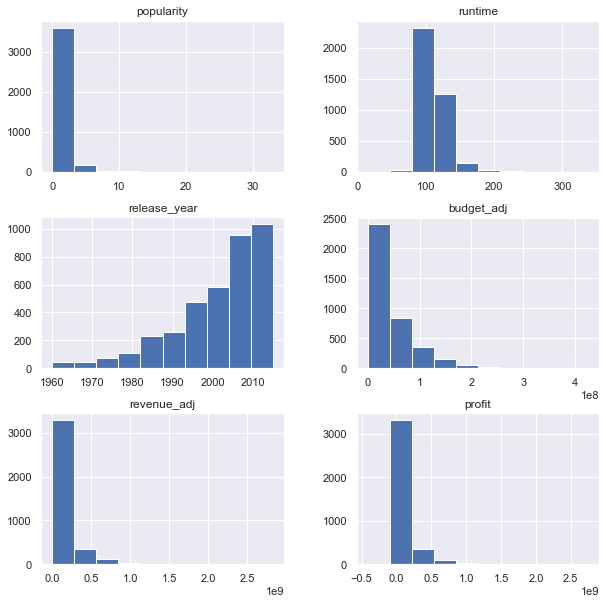

In [19]:
#first, we look at the histogram for each variable 

df.hist(figsize=(10,10));

From the histogram above, we observed that: 
1. More than 80% of the movies that the popularity is less than 10. 
2. The runtime of most of the movies is at 100 minutes. 
3. The production of movies increases gradually from year 1960 to 2015. 
4. Most of the movies are budgeted not more than 100 million USD. 
5. Most of the movies earn a revenue at not more than 500 million USD as well as profit of 500 million USD


### Top 10 directors, casts, production companies, genres 

In [20]:
#check the top 10 directors 

director = df['director'].str.cat(sep='|').split('|')
top_10_directors = pd.Series(director).value_counts()[:10]
top_10_directors

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Robert Rodriguez     17
Tim Burton           17
Steven Soderbergh    17
Oliver Stone         15
Renny Harlin         15
dtype: int64

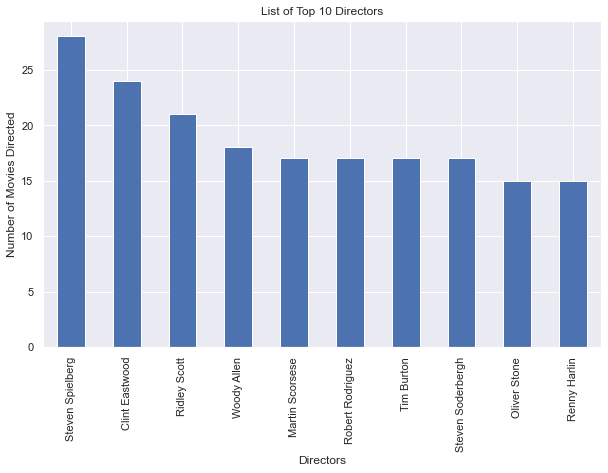

In [21]:
#plot bar chart 

graph = top_10_directors.plot.bar(figsize=(10,6))
graph.set(title = 'List of Top 10 Directors', xlabel = 'Directors', ylabel = 'Number of Movies Directed');

The director with most movies directed is Steven Spielberg (28 movies), followed by Clint EastWood (24 movies) and Ridley Scott (21 movies). 

In [22]:
#check the top 10 actors

actors = df['cast'].str.cat(sep='|').split('|')
top_10_actors = pd.Series(actors).value_counts()[:10]
top_10_actors

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Harrison Ford         34
Brad Pitt             34
Sylvester Stallone    34
dtype: int64

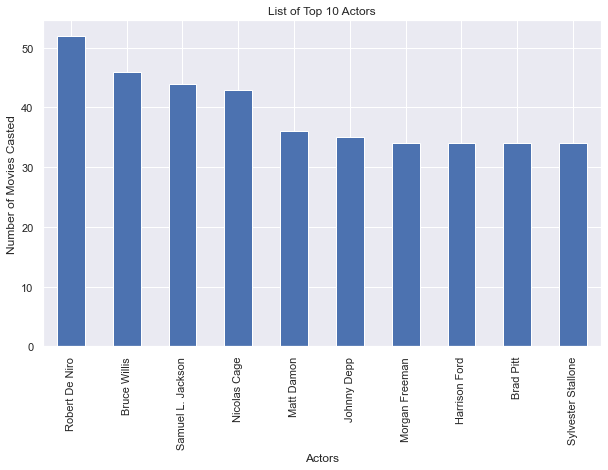

In [23]:
#plot bar chart 

graph = top_10_actors.plot.bar(figsize=(10,6))
graph.set(title = 'List of Top 10 Actors', xlabel = 'Actors', ylabel = 'Number of Movies Casted');

Robert De Niro is the top actor who has casted for more than 50 movies. Followed by Bruce Willis (46 movies) and Samuel L. Jackson (44 movies). 

In [24]:
#check the top 10 production companies dd

companies = df['production_companies'].str.cat(sep='|').split('|')
top_10_companies = pd.Series(companies).value_counts()[:10]
top_10_companies

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
New Line Cinema                           152
Walt Disney Pictures                      117
Touchstone Pictures                       116
Metro-Goldwyn-Mayer (MGM)                 109
Relativity Media                          102
dtype: int64

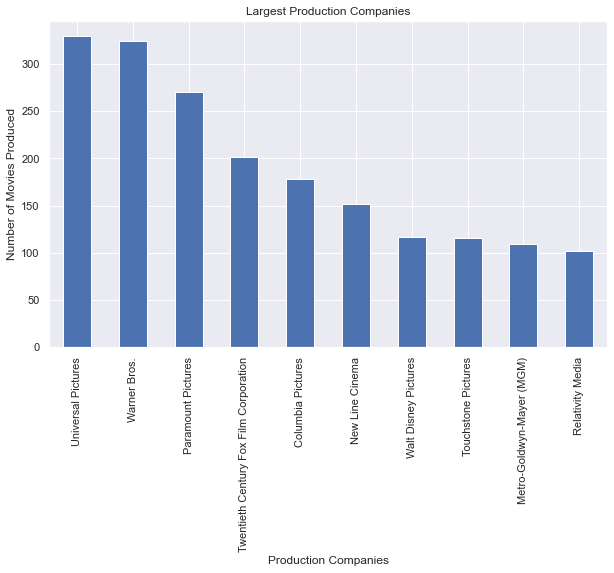

In [25]:
#plot bar chart 

graph = top_10_companies.plot.bar(figsize=(10,6))
graph.set(title = 'Largest Production Companies', xlabel = 'Production Companies', ylabel = 'Number of Movies Produced');

From this data, we observed that Universal Pictures produce the most movies (329 movies). Followed by Warner Bros., the total movies produced is 324 movies. Paramount Picture at the third place, the total movies produced is 270 movies.  

In [26]:
#check the top 10 genres

genres = df['genres'].str.cat(sep='|').split('|')
top_10_genres = pd.Series(genres).value_counts()[:10]
top_10_genres

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
dtype: int64

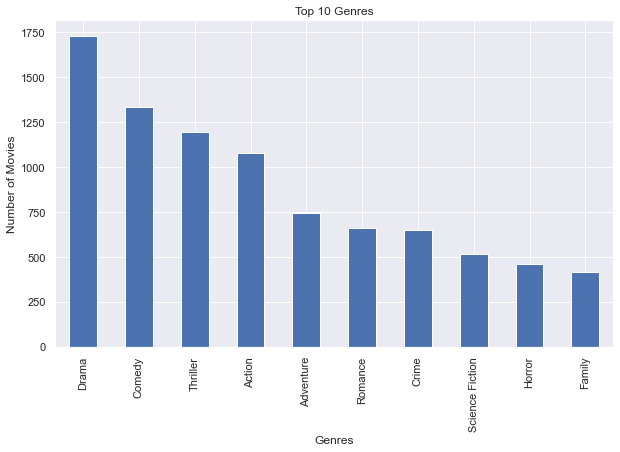

In [27]:
#plot bar chart 

graph = top_10_genres.plot.bar(figsize=(10,6))
graph.set(title = 'Top 10 Genres', xlabel = 'Genres', ylabel = 'Number of Movies');

Drama is the top in the movies genres list and followed by comedy and thriller. 

### What is the movies popularity trend over the years 

In [28]:
#find the mean popularity for each year

year_popular = df.groupby('release_year').popularity.mean()

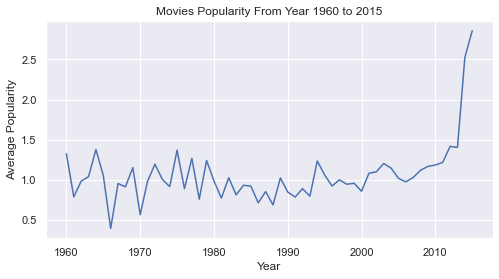

In [29]:
#plot line chart

year_popular.plot(figsize = (8,4), title='Movies Popularity From Year 1960 to 2015', xlabel = 'Year', ylabel='Average Popularity');

In [30]:
#Find mean budget each year

year_budget = df.groupby('release_year').budget_adj.mean()

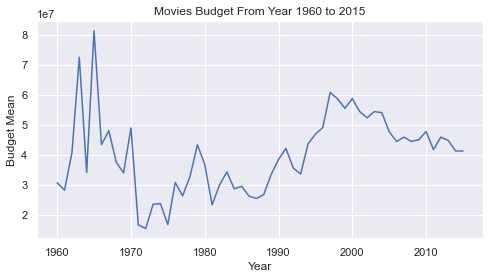

In [31]:
#plot line chart

year_budget.plot(figsize = (8,4), title='Movies Budget From Year 1960 to 2015', xlabel = 'Year', ylabel='Budget Mean');

In [32]:
#Find the mean runtime for each year

year_runtime = df.groupby('release_year').runtime.mean()

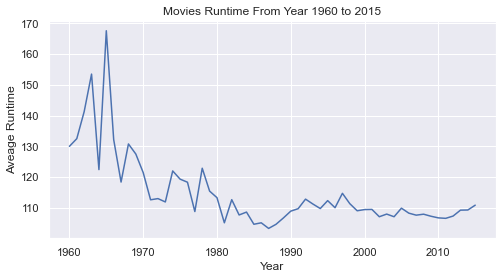

In [33]:
#plot line chart

year_runtime.plot(figsize = (8,4), title='Movies Runtime From Year 1960 to 2015', xlabel = 'Year', ylabel='Aveage Runtime');

From the graph above, we noticed: 
- there is sharp drop in year 1967 and 1970. 
- Then the movies popularity trend fluctuated until the year 1990
- the trend increased gradually from 1990 to 2010, before it experienced a sharp rise after year 2012. 
- we could deduce that the increasing trend could be due to the high budget movies and high volume of movies produced. 
- the runtime of the movies has been largely reduced from 170 minutes to about 90-110 minutes after year 2000.  

In [34]:
#Find mean revenue for each year

year_revenue = df.groupby('release_year').revenue_adj.mean()

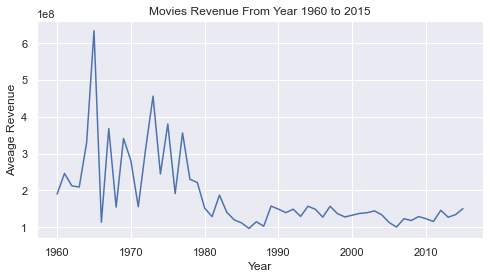

In [35]:
#plot line chart

year_revenue.plot(figsize = (8,4), title='Movies Revenue From Year 1960 to 2015', xlabel = 'Year', ylabel='Aveage Revenue');

In [36]:
#Find mean profit each year

year_profit = df.groupby('release_year').profit.mean()

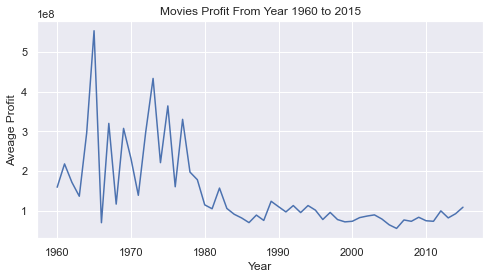

In [37]:
#plot line chart

year_profit.plot(figsize = (8,4), title='Movies Profit From Year 1960 to 2015', xlabel = 'Year', ylabel='Aveage Profit');

- Despite of the increasing trend in movies popularity, the average revenue and profit did not follow the trend. 
- This might be because of the high budget of each movie and high volume of the movies produced each year. 

### Find the movies with maximum and minimum budget/revenue/profit/popularity/runtime

In [38]:
def min_max(column_name):

    """
    This is a function to find the minimum and maximum values of the columns that we are interested in. 
    This function will return a table of the minimum and maximum values with all the details
    
    """
    
    max_value = df[column_name].idxmax()
    max_details = pd.DataFrame(df.loc[max_value])
    
    min_value = df[column_name].idxmin()
    min_details = pd.DataFrame(df.loc[min_value])
    
    both_values = pd.concat([max_details, min_details],axis=1)
    
    return(both_values)

In [39]:
#Find the movies with minimum and maximum budget

min_max('budget_adj')

,2244,3581
popularity,0.25054,0.52043
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
runtime,100.0,90.0
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,120dB Films|Scion Films|Voodoo Production Serv...
release_year,2010,2011
budget_adj,425000000.0,0.969398
revenue_adj,11087569.0,1335.830503


- We found that "The Warrior's Way" has the highest budget ($425 million USD). 
- On the other hand, it is noticed that the movie "Love, Wedding, Marriage" has the budget of less than a dollar. 

In [40]:
#Find the movies which earn the highest and lowest revenue

min_max('revenue_adj')

,1386,5067
popularity,9.432768,0.462609
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_year,2009,2003
budget_adj,240886902.887613,7112115.868695
revenue_adj,2827123750.41189,2.370705


Avatar is the highest revenue movie but it is not the top profit movie due to its high budget. 

In [41]:
#Check the movies which earn the highest and lowest movies

min_max('profit')

,1329,2244
popularity,12.037933,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121.0,100.0
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_year,1977,2010
budget_adj,39575591.358274,425000000.0
revenue_adj,2789712242.27745,11087569.0


Star Wars is the top profit movies. The revenue earned is 37 million USD less than Avatar, but due to its low budget which makes this movie highly profitable. 

In [42]:
#Find the most and least popular movies.

min_max('popularity')

,0,6065
popularity,32.985763,0.010335
original_title,Jurassic World,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Thomas Kretschmann|Yanina Studilina|Philippe R...
director,Colin Trevorrow,Fyodor Bondarchuk
runtime,124.0,131.0
genres,Action|Adventure|Science Fiction|Thriller,War|Action
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Art Pictures Studio
release_year,2015,2013
budget_adj,137999939.280026,28081000.582213
revenue_adj,1392445892.5238,63771501.154129


The most popular movie is Jurassic World in this dataset and the least popular movie is Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´. 

In [43]:
#Find the longest and shortest movies

min_max('runtime')

,2107,5162
popularity,0.534192,0.208637
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338.0,15.0
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
release_year,2010,2003
budget_adj,18000000.0,11.853526
revenue_adj,871279.0,5.926763


The movie with the longest runtime is Carlos (338 minutes), while the shortest movie is Kid's Story (15 minutes)

### What are the properities of Top 100 Revenue Movies?

In [44]:
#Create a copy of dataset

df_revenue = df.copy()

In [45]:
#Sort the data in descending order

df_revenue_sorted = df_revenue.sort_values(['revenue_adj'], ascending=False)

In [46]:
#print the data

df_revenue_sorted.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj,profit
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009,2.408869e+08,2.827124e+09,2.586237e+09
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977,3.957559e+07,2.789712e+09,2.750137e+09
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124.0,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975,2.836275e+07,1.907006e+09,1.878643e+09


In [47]:
#The descriptive statistics of the data

df_revenue_sorted[:100].describe()

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
count,100.000000,100.000000,100.00000,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.458492,131.630000,1998.34000,1.324182e+08,1.070078e+09,9.376597e+08
std,3.846122,26.168319,15.29192,7.743329e+07,4.028286e+08,4.109621e+08
min,0.142486,78.000000,1961.00000,1.235601e+07,7.214689e+08,5.535378e+08
25%,2.210301,115.000000,1990.00000,6.517483e+07,8.078311e+08,6.737869e+08
50%,3.642131,132.500000,2004.00000,1.366043e+08,9.600996e+08,8.241871e+08
75%,5.760471,146.500000,2010.00000,1.872243e+08,1.141442e+09,1.032382e+09
max,32.985763,201.000000,2015.00000,3.683713e+08,2.827124e+09,2.750137e+09


In [48]:
#Copy a set of data

data = df_revenue_sorted.copy()

In [49]:
#find the top 100 movies 

top_hundred = data.query('revenue_adj >= 7.214689e+08')
below_hundred = data.query('revenue_adj < 7.214689e+08')

In [50]:
#The Genres of the Top 100 Movies

genres = top_hundred['genres'].str.cat(sep='|').split('|')
top_100_genres = pd.Series(genres).value_counts()
top_100_genres

Adventure          72
Action             51
Fantasy            35
Family             31
Science Fiction    29
Thriller           22
Comedy             18
Drama              18
Animation          17
Romance             9
Crime               8
Mystery             6
Music               2
Horror              2
War                 1
dtype: int64

In [51]:
#The Genres of the Below 100 Movies

genres1 = below_hundred['genres'].str.cat(sep='|').split('|')
below_100_genres = pd.Series(genres1).value_counts()
below_100_genres

Drama              1711
Comedy             1317
Thriller           1172
Action             1025
Adventure           671
Romance             649
Crime               641
Science Fiction     488
Horror              457
Family              386
Fantasy             360
Mystery             337
Animation           182
Music               129
History             128
War                 118
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64

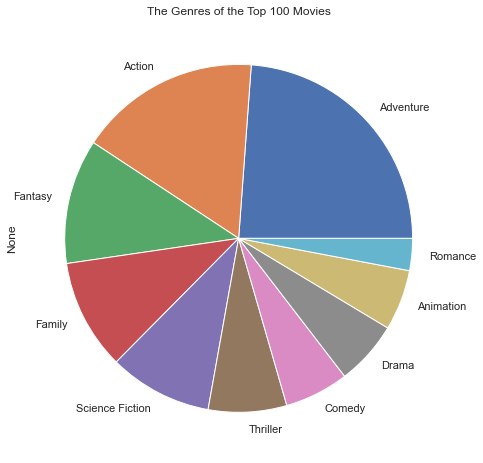

In [52]:
#The pie chart 

top_100_genres.nlargest(10).plot(kind='pie', title = 'The Genres of the Top 100 Movies', figsize=(8,8));

The most popular genres for top 100 movies is Adventure, followed by Action and Fantasy. 

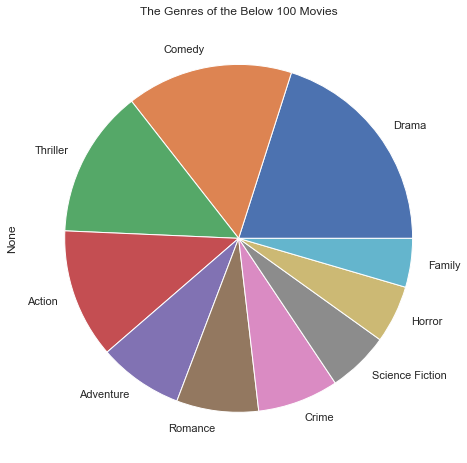

In [53]:
#The pie chart 

below_100_genres.nlargest(10).plot(kind='pie', title = 'The Genres of the Below 100 Movies', figsize=(8,8));

The most popular genres for all other movies is Drama and Comedy.

In [54]:
#Create a table to compare the mean of each variable for top 100 movies and other movies

df_revenue_top_100 = pd.DataFrame([df_revenue_sorted[:100].mean(), df_revenue_sorted[100:].mean()])
df_revenue_top_100

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
0,4.458492,131.630000,1998.340000,1.324182e+08,1.070078e+09,9.376597e+08
1,1.115938,108.749798,2001.307152,4.235274e+07,1.135780e+08,7.122522e+07


In [55]:
#divide budget_adj, revenue_adj, profit columns by 1,000,000 to get values in million USD

df_revenue_top_100['budget_adj'] = df_revenue_top_100['budget_adj']/1000000
df_revenue_top_100['revenue_adj'] = df_revenue_top_100['revenue_adj']/1000000
df_revenue_top_100['profit'] = df_revenue_top_100['profit']/1000000
df_revenue_top_100

#Assign new index

s = pd.Series(['Top 100 Movies', 'All Movies'])
df_revenue_top_100_1 = df_revenue_top_100.set_index([s])

df_revenue_top_100_1 

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
Top 100 Movies,4.458492,131.630000,1998.340000,132.418197,1070.077848,937.659652
All Movies,1.115938,108.749798,2001.307152,42.352736,113.577961,71.225225


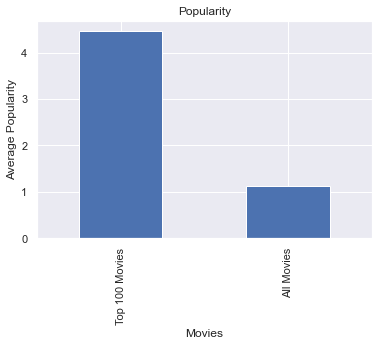

In [56]:
#Plot a bar chart to compare the popularity of top 100 movies and all movies

df_revenue_top_100_1.popularity.plot(figsize = (6,4), kind='bar', title='Popularity', xlabel='Movies', ylabel='Average Popularity');

The average popularity for Top 100 movies is 4.46. 

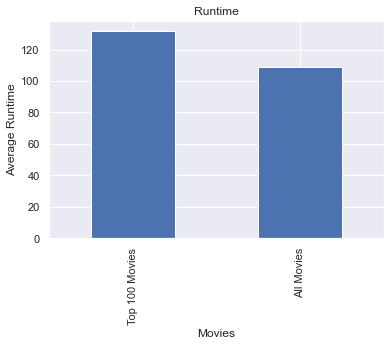

In [57]:
#Plot a bar chart to compare the runtime of top 100 movies and all movies

df_revenue_top_100_1.runtime.plot(figsize = (6,4), kind='bar', title='Runtime', xlabel='Movies', ylabel='Average Runtime');

The average runtime for top 100 movies is 131 minutes. 

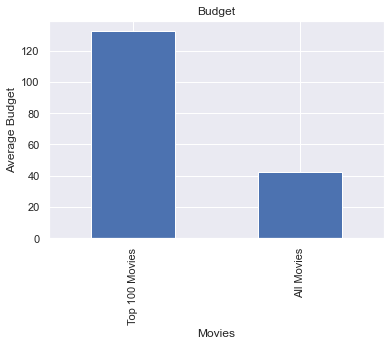

In [58]:
#Plot a bar chart to compare the budget of top 100 movies and all movies

df_revenue_top_100_1.budget_adj.plot(figsize = (6,4), kind='bar', title='Budget', xlabel='Movies', ylabel='Average Budget');

The average budget of the top 100 movies is 132 million USD. 

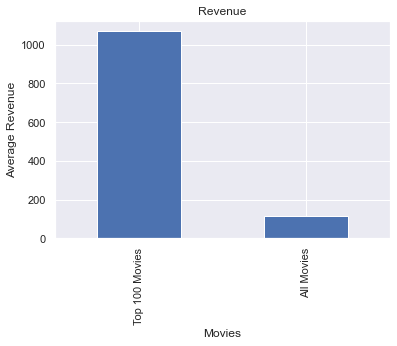

In [59]:
#Plot a bar chart to compare the revenue of top 100 movies and all movies

df_revenue_top_100_1.revenue_adj.plot(figsize = (6,4), kind='bar', title='Revenue', xlabel='Movies', ylabel='Average Revenue');

The average revenue top 100 movies earned is 1,070 million USD.

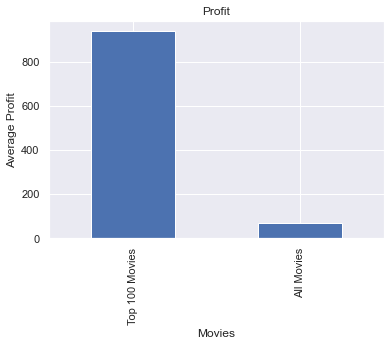

In [60]:
#Plot a bar chart to compare the profit of top 100 movies and all movies

df_revenue_top_100_1.profit.plot(figsize = (6,4), kind='bar', title='Profit', xlabel='Movies', ylabel='Average Profit');

The average profit top 100 movies earned is 937 million USD.

<a id='conclusions'></a>
## Conclusions



### Findings and Results 

1. The top 3 directors who directed most movies are Steven Spielberg, Clint Eastwood and Ridley Scott


2. The top 3 actors who casted most movies are Robert De Niro, Bruce Willis and Samuel L. Jackson. 


3. The top 3 production companies who produced most movies  are Universal Pictures, Warner Bros and Paramount Pictures. 


4. The top 3 most produced genres are Drama, Comedy and Thriller. 


5. The movie popularity increases sharply from 2010.


6. The movie production increases gradually from year 1960. 


7. The most profit movie is Star Wars


8. Avatar is the highest revenue movie but it is not the top profit movie due to its high budget. 


9. The highest budget movie is The Warrior's Way. 


10. The longest movie is Shattered Glass. 


11. The top 100 movies have properties of:- 
 - Genres : Adventure, Action and Fantasy 
 - Average runtime : 131 minutes
 - Average budget : 132 million USD
 

12. The top 100 movies generally have return as follows:-
 - Average Revenue : 1,070 million USD
 - Average Profit : 937 million USD
 - Popularity : 4.46

### Limitations

1. This dataset has a lot of null and zero values, thus we have to drop the over 6000 rows. This may lead to incorrect analysis. 


2. We use budget_adj and revenue_adj to take into account of the inflation over the years. The results may be different if no inflation is taken into consideration.


3. While checking the minimum values for budget, we noticed that the minimum values is 0.969398 USD which is extremely low to produce a movie.